In [65]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [66]:
file = open('bulk_1250K.xyz','r')
f1,f2,f3 = [],[],[]
count = 0
while True:
    
    n = file.readline()
    start = file.readline()
    if (start == ''):
        break
    x1,x2,x3 = [],[],[]
    
    
    for i in range(int(n)):
        line = file.readline()
        line = line.split()
        x1.append(float(line[1]))
        x2.append(float(line[2]))
        x3.append(float(line[3]))
        f1.append(float(line[5]))
        f2.append(float(line[6]))
        f3.append(float(line[7]))
        mat_x = np.array([x1]*32)
        mat_y = np.array([x2]*32)
        mat_z = np.array([x3]*32)
        
    r1 = np.absolute(mat_x - mat_x.T)
    r2 = np.absolute(mat_y - mat_y.T)
    r3 = np.absolute(mat_z - mat_z.T)

        
    r = np.sqrt(np.square(r1)+np.square(r2)+np.square(r3))
        
    r_k1 = np.divide(r1,r)
    r_k2 = np.divide(r2,r)
    r_k3 = np.divide(r3,r)
    r_c = np.amax(r)
#     r_c  = 8
    
    r_k1[np.where(np.isnan(r_k1))] = 0
    r_k2[np.where(np.isnan(r_k2))] = 0
    r_k3[np.where(np.isnan(r_k3))] = 0

    func = 0.5*(np.cos(np.pi*r/r_c) + 1)
        
    v1 = np.multiply(r_k1,np.multiply(np.exp(-np.square(r/32)),func))
    v2 = np.multiply(r_k2,np.multiply(np.exp(-np.square(r/32)),func))
    v3 = np.multiply(r_k3,np.multiply(np.exp(-np.square(r/32)),func))
        
    v1 = np.sum(v1,axis=0)
    v2 = np.sum(v2,axis=0)
    v3 = np.sum(v3,axis=0)
#     print(v1[0])
    
    if (count == 0):
        X_train = np.vstack((v1,np.vstack((v2,v3))))
    else:
        X_train = np.hstack((X_train,np.vstack((v1,np.vstack((v2,v3))))))
    
    count += 1

f1 = np.array(f1)
f2 = np.array(f2)
f3 = np.array(f3)
print(X_train.shape)
X_train1 = pd.DataFrame(X_train.T)
X_train1.head(5)
X_train = X_train.T
                                
file.close()
        
        
    

(3, 6528)


In [67]:
print(X_train.shape)
print(f1.shape)

(6528, 3)
(6528,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_train,f1,test_size=0.2)
model = KernelRidge(kernel='rbf',alpha=0.01,gamma=100)
model.fit(X_train,y_train)
print(mean_absolute_error(model.predict(X_test),y_test))


0.0120984785964


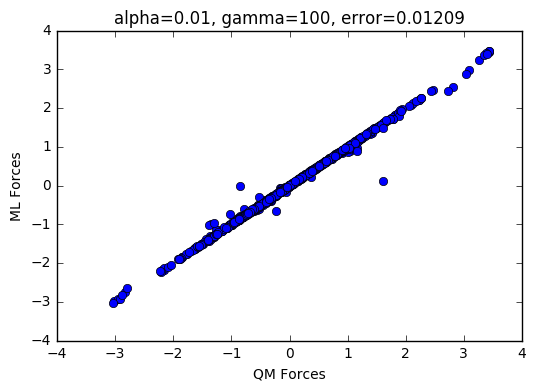

In [69]:
plt.plot(y_test,model.predict(X_test),'bo')
plt.xlabel("QM Forces")
plt.ylabel("ML Forces")
plt.title("alpha=0.01, gamma=100, error=0.01209")
plt.savefig('plot2.jpg')
plt.show()